In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler #used for 'Feature Scaling'
from matplotlib import pyplot

import os
if not os.path.exists("/content/football_data.csv"):
    os.symlink("/content/drive/My Drive/DataAnalytics/Clustering_Football/football_data.csv","/content/football_data.csv")  
# Read the data
X_full = pd.read_csv('/content/football_data.csv')
X_full.head()
X_full.shape

(18207, 89)

In [ ]:
numerical_cols = [cname for cname in X_full.columns if 
                X_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
X_data = X_full[numerical_cols].copy()
X_data.shape

(18207, 44)

In [ ]:
X_data.dropna(inplace=True)
X_data.shape

(18147, 44)

In [ ]:
X_data.head()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,0,158023,31,94,94,2202,5.0,4.0,4.0,10.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,1,20801,33,94,94,2228,5.0,4.0,5.0,7.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,2,190871,26,92,93,2143,5.0,5.0,5.0,10.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,3,193080,27,91,93,1471,4.0,3.0,1.0,1.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,4,192985,27,91,92,2281,4.0,5.0,4.0,7.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [ ]:
missing_values_count = X_data.isnull().sum()
missing_values_count

Unnamed: 0                  0
ID                          0
Age                         0
Overall                     0
Potential                   0
Special                     0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Jersey Number               0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility                     0
Reactions                   0
Balance                     0
ShotPower                   0
Jumping                     0
Stamina                     0
Strength                    0
LongShots                   0
Aggression                  0
Interceptions               0
Positioning                 0
Vision    

In [ ]:
X_data.head()
X_data = X_data.iloc[:,2:44 ].values
X_data.shape

(18147, 42)

In [ ]:
#Initialize our scaler for normalizing the data
#scaler = StandardScaler()
#X_data = pd.DataFrame(scaler.fit_transform(X_data))
from sklearn.preprocessing import normalize
X_data = normalize(X_data)

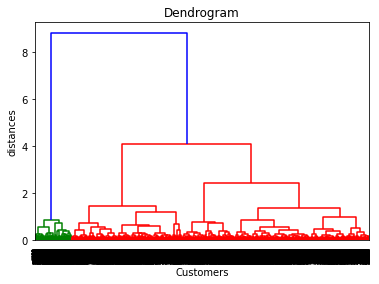

In [ ]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X_data, method='ward'), show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('distances')
plt.show()

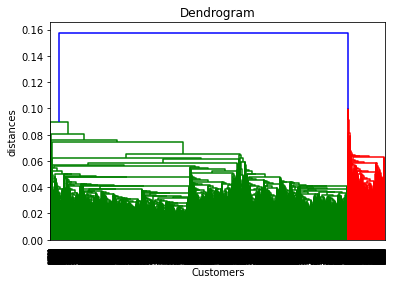

In [ ]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X_data, method='average'), show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('distances')
plt.show()

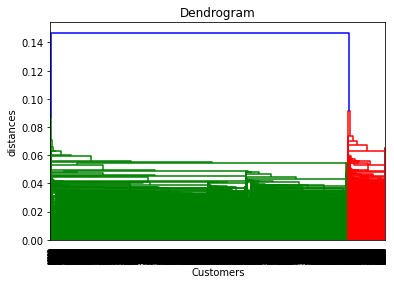

In [ ]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X_data, method='centroid'), show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('distances')
plt.show()

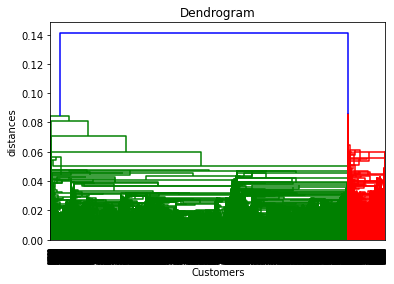

In [ ]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X_data, method='median'),show_leaf_counts ='True')
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('distances')
plt.show()

In [ ]:
X_data.shape

[2 4 2 ... 4 2 0]
[[0.01378445 0.04179801 0.04179801 ... 0.0066699  0.00622524 0.00355728]
 [0.01450775 0.04132511 0.04132511 ... 0.00659443 0.0061548  0.00483592]
 [0.01188204 0.04204415 0.04250115 ... 0.00685502 0.00685502 0.00502702]
 ...
 [0.01316462 0.03867107 0.05512684 ... 0.00822789 0.00493673 0.01069625]
 [0.01355485 0.03747518 0.05262472 ... 0.01116282 0.00637875 0.0071761 ]
 [0.01187128 0.03412992 0.04896901 ... 0.00667759 0.00890346 0.00667759]] (18147, 42)
Counter({0: 7315, 2: 3503, 3: 2832, 4: 2472, 1: 2025})


0.21227029741025485

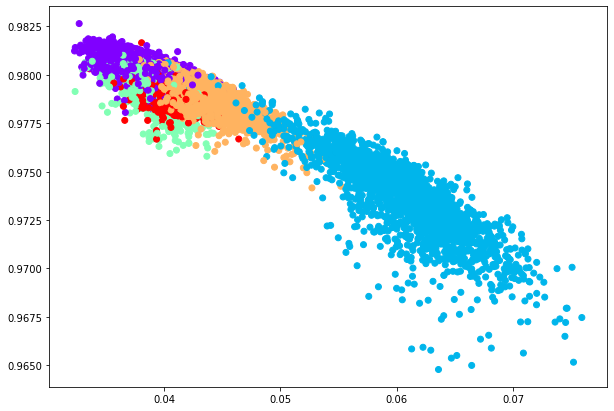

In [ ]:
# Fitting the hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from numpy import unique
from numpy import where
from collections import Counter, defaultdict

euclid = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')
Y_hc = euclid.fit_predict(X_data)
print(Y_hc)
print(X_data, X_data.shape)
plt.figure(figsize=(10, 7))
plt.scatter(X_data[:,1], X_data[:,3], c=euclid.labels_, cmap='rainbow')
print(Counter(euclid.labels_))
metrics.silhouette_score(X_data, euclid.labels_, metric='euclidean')

[2 2 2 ... 2 2 3]
[[0.01378445 0.04179801 0.04179801 ... 0.0066699  0.00622524 0.00355728]
 [0.01450775 0.04132511 0.04132511 ... 0.00659443 0.0061548  0.00483592]
 [0.01188204 0.04204415 0.04250115 ... 0.00685502 0.00685502 0.00502702]
 ...
 [0.01316462 0.03867107 0.05512684 ... 0.00822789 0.00493673 0.01069625]
 [0.01355485 0.03747518 0.05262472 ... 0.01116282 0.00637875 0.0071761 ]
 [0.01187128 0.03412992 0.04896901 ... 0.00667759 0.00890346 0.00667759]] (18147, 42)
Counter({3: 6654, 2: 6609, 1: 2859, 0: 1097, 4: 928})


0.1921993084094223

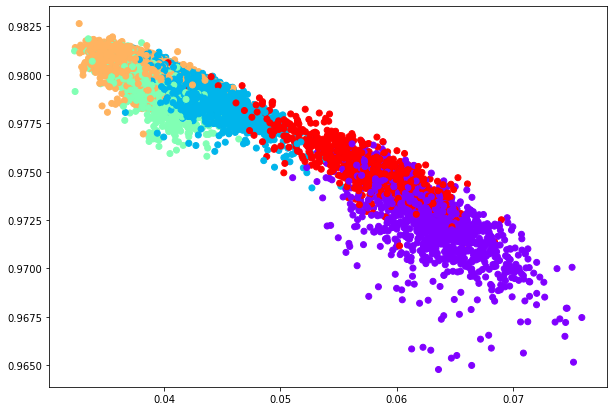

In [ ]:
# Fitting the hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
from numpy import unique
from numpy import where
from collections import Counter, defaultdict

euclid = AgglomerativeClustering(n_clusters=5, affinity = 'manhattan', linkage = 'complete')
Y_hc = euclid.fit_predict(X_data)
print(Y_hc)
print(X_data, X_data.shape)
plt.figure(figsize=(10, 7))
plt.scatter(X_data[:,1], X_data[:,3], c=euclid.labels_, cmap='rainbow')
print(Counter(euclid.labels_))

metrics.silhouette_score(X_data, euclid.labels_, metric='manhattan')

[0 0 0 ... 0 0 2]
[[0.01378445 0.04179801 0.04179801 ... 0.0066699  0.00622524 0.00355728]
 [0.01450775 0.04132511 0.04132511 ... 0.00659443 0.0061548  0.00483592]
 [0.01188204 0.04204415 0.04250115 ... 0.00685502 0.00685502 0.00502702]
 ...
 [0.01316462 0.03867107 0.05512684 ... 0.00822789 0.00493673 0.01069625]
 [0.01355485 0.03747518 0.05262472 ... 0.01116282 0.00637875 0.0071761 ]
 [0.01187128 0.03412992 0.04896901 ... 0.00667759 0.00890346 0.00667759]] (18147, 42)
Counter({2: 7315, 0: 5975, 3: 2832, 1: 2025})


0.24758665595750845

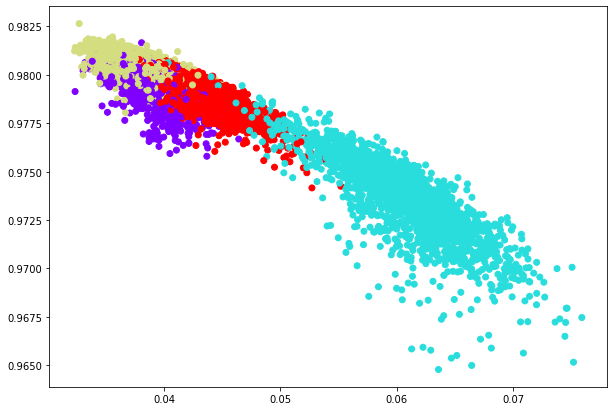

In [ ]:
# Fitting the hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from numpy import unique
from numpy import where
from collections import Counter, defaultdict

euclid = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')
Y_hc = euclid.fit_predict(X_data)
print(Y_hc)
print(X_data, X_data.shape)
plt.figure(figsize=(10, 7))
plt.scatter(X_data[:,1], X_data[:,3], c=euclid.labels_, cmap='rainbow')
print(Counter(euclid.labels_))
metrics.silhouette_score(X_data, euclid.labels_, metric='euclidean')

[2 2 2 ... 2 2 3]
[[0.01378445 0.04179801 0.04179801 ... 0.0066699  0.00622524 0.00355728]
 [0.01450775 0.04132511 0.04132511 ... 0.00659443 0.0061548  0.00483592]
 [0.01188204 0.04204415 0.04250115 ... 0.00685502 0.00685502 0.00502702]
 ...
 [0.01316462 0.03867107 0.05512684 ... 0.00822789 0.00493673 0.01069625]
 [0.01355485 0.03747518 0.05262472 ... 0.01116282 0.00637875 0.0071761 ]
 [0.01187128 0.03412992 0.04896901 ... 0.00667759 0.00890346 0.00667759]] (18147, 42)
Counter({3: 6654, 2: 6609, 1: 2859, 0: 2025})


0.2553758725728855

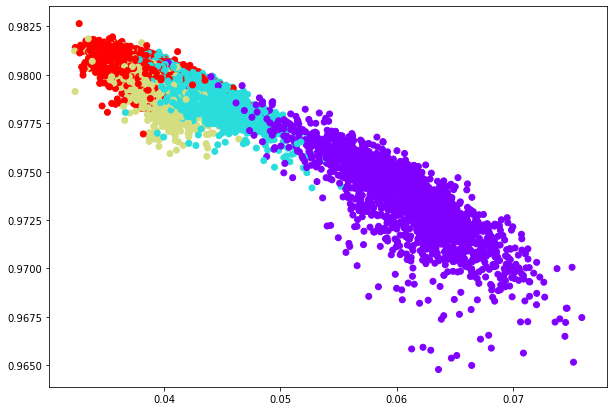

In [ ]:
# Fitting the hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from numpy import unique
from numpy import where
from collections import Counter, defaultdict

euclid = AgglomerativeClustering(n_clusters=4, affinity = 'manhattan', linkage = 'complete')
Y_hc = euclid.fit_predict(X_data)
print(Y_hc)
print(X_data, X_data.shape)
plt.figure(figsize=(10, 7))
plt.scatter(X_data[:,1], X_data[:,3], c=euclid.labels_, cmap='rainbow')
print(Counter(euclid.labels_))
metrics.silhouette_score(X_data, euclid.labels_, metric='manhattan')

[2 2 2 ... 2 2 0]
[[0.01378445 0.04179801 0.04179801 ... 0.0066699  0.00622524 0.00355728]
 [0.01450775 0.04132511 0.04132511 ... 0.00659443 0.0061548  0.00483592]
 [0.01188204 0.04204415 0.04250115 ... 0.00685502 0.00685502 0.00502702]
 ...
 [0.01316462 0.03867107 0.05512684 ... 0.00822789 0.00493673 0.01069625]
 [0.01355485 0.03747518 0.05262472 ... 0.01116282 0.00637875 0.0071761 ]
 [0.01187128 0.03412992 0.04896901 ... 0.00667759 0.00890346 0.00667759]] (18147, 42)
Counter({0: 10147, 2: 5975, 1: 2025})


0.3098389561326877

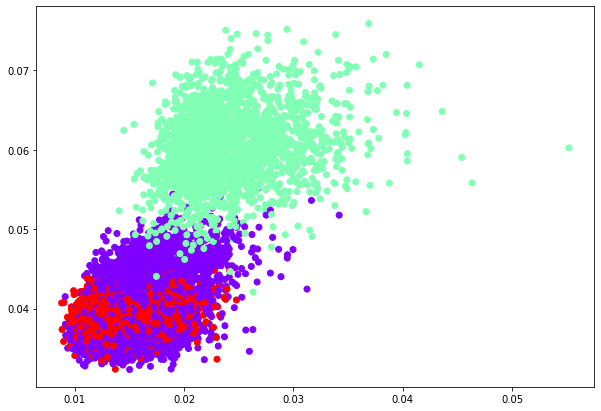

In [ ]:
# Fitting the hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from numpy import unique
from numpy import where
from collections import Counter, defaultdict

euclid = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
Y_hc = euclid.fit_predict(X_data)
print(Y_hc)
print(X_data, X_data.shape)
plt.figure(figsize=(10, 7))
plt.scatter(X_data[:,0], X_data[:,1], c=euclid.labels_, cmap='rainbow')
print(Counter(euclid.labels_))
metrics.silhouette_score(X_data, euclid.labels_, metric='euclidean')

[2 2 2 ... 2 2 0]
[[0.01378445 0.04179801 0.04179801 ... 0.0066699  0.00622524 0.00355728]
 [0.01450775 0.04132511 0.04132511 ... 0.00659443 0.0061548  0.00483592]
 [0.01188204 0.04204415 0.04250115 ... 0.00685502 0.00685502 0.00502702]
 ...
 [0.01316462 0.03867107 0.05512684 ... 0.00822789 0.00493673 0.01069625]
 [0.01355485 0.03747518 0.05262472 ... 0.01116282 0.00637875 0.0071761 ]
 [0.01187128 0.03412992 0.04896901 ... 0.00667759 0.00890346 0.00667759]] (18147, 42)
Counter({0: 9513, 2: 6609, 1: 2025})


0.31732754589439977

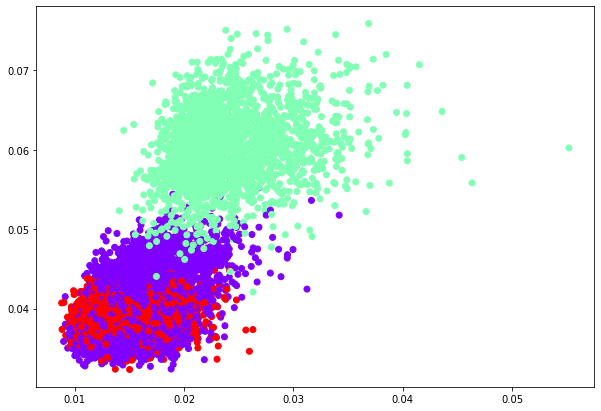

In [ ]:
# Fitting the hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from numpy import unique
from numpy import where
from collections import Counter, defaultdict

euclid = AgglomerativeClustering(n_clusters=3, affinity = 'manhattan', linkage = 'complete')
Y_hc = euclid.fit_predict(X_data)
print(Y_hc)
print(X_data, X_data.shape)
plt.figure(figsize=(10, 7))
plt.scatter(X_data[:,0], X_data[:,1], c=euclid.labels_, cmap='rainbow')
print(Counter(euclid.labels_))
metrics.silhouette_score(X_data, euclid.labels_, metric='manhattan')

[1 1 1 ... 1 1 1]
[[0.01378445 0.04179801 0.04179801 ... 0.0066699  0.00622524 0.00355728]
 [0.01450775 0.04132511 0.04132511 ... 0.00659443 0.0061548  0.00483592]
 [0.01188204 0.04204415 0.04250115 ... 0.00685502 0.00685502 0.00502702]
 ...
 [0.01316462 0.03867107 0.05512684 ... 0.00822789 0.00493673 0.01069625]
 [0.01355485 0.03747518 0.05262472 ... 0.01116282 0.00637875 0.0071761 ]
 [0.01187128 0.03412992 0.04896901 ... 0.00667759 0.00890346 0.00667759]] (18147, 42)
Counter({1: 16122, 0: 2024, 2: 1})


0.6194874830455478

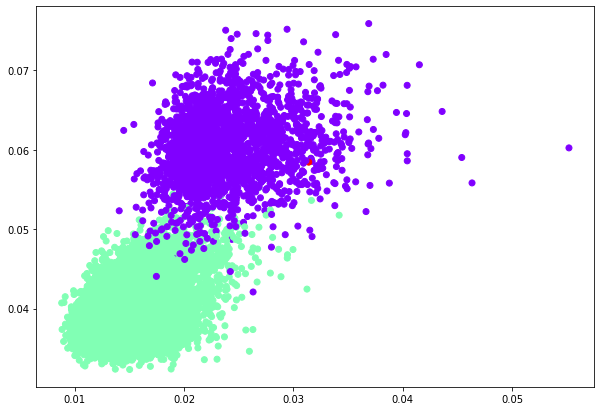

In [ ]:
# Fitting the hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from numpy import unique
from numpy import where
from collections import Counter, defaultdict

euclid = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'average')
Y_hc = euclid.fit_predict(X_data)
print(Y_hc)
print(X_data, X_data.shape)
plt.figure(figsize=(10, 7))
plt.scatter(X_data[:,0], X_data[:,1], c=euclid.labels_, cmap='rainbow')
print(Counter(euclid.labels_))
metrics.silhouette_score(X_data, euclid.labels_, metric='euclidean')

[0 0 0 ... 0 0 0]
[[0.01378445 0.04179801 0.04179801 ... 0.0066699  0.00622524 0.00355728]
 [0.01450775 0.04132511 0.04132511 ... 0.00659443 0.0061548  0.00483592]
 [0.01188204 0.04204415 0.04250115 ... 0.00685502 0.00685502 0.00502702]
 ...
 [0.01316462 0.03867107 0.05512684 ... 0.00822789 0.00493673 0.01069625]
 [0.01355485 0.03747518 0.05262472 ... 0.01116282 0.00637875 0.0071761 ]
 [0.01187128 0.03412992 0.04896901 ... 0.00667759 0.00890346 0.00667759]] (18147, 42)
Counter({0: 16122, 1: 2025})


0.6627485584336004

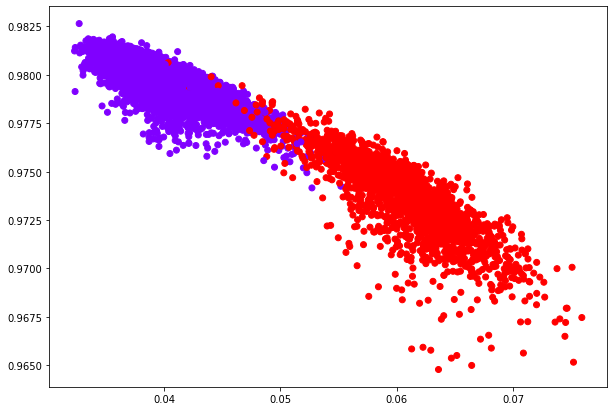

In [ ]:
# Fitting the hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from numpy import unique
from numpy import where
from collections import Counter, defaultdict

euclid = AgglomerativeClustering(n_clusters=2, affinity = 'manhattan', linkage = 'average')
Y_hc = euclid.fit_predict(X_data)
print(Y_hc)
print(X_data, X_data.shape)
plt.figure(figsize=(10, 7))
plt.scatter(X_data[:,1], X_data[:,3], c=euclid.labels_, cmap='rainbow')
print(Counter(euclid.labels_))
metrics.silhouette_score(X_data, euclid.labels_, metric='manhattan')

DB SCAN

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
range_n_clusters = [2,3,4,5]

for n_clusters in range_n_clusters:
  cluster = KMeans(n_clusters=n_clusters,random_state=10)
  cluster_labels = cluster.fit_predict(X_data)
  silhouette_avg = silhouette_score(X_data, cluster_labels)
  print("For n_clusters=",n_clusters, "The average silhouette score is=",silhouette_avg)

For n_clusters= 2 The average silhouette score is= 0.6466210106949047
For n_clusters= 3 The average silhouette score is= 0.3252800316320189
For n_clusters= 4 The average silhouette score is= 0.2635834740866431
For n_clusters= 5 The average silhouette score is= 0.229479641207659


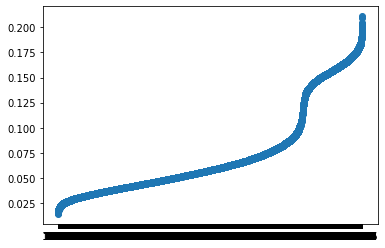

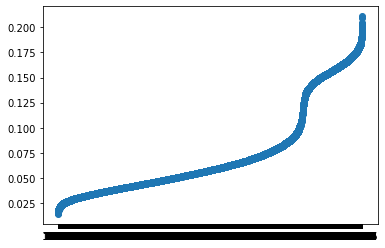

In [ ]:
df2=pd.DataFrame(columns=['index','distance'])
for i in range(0, len(X_data)-1):
  dist = np.linalg.norm(X_data[i]-X_data[i+1])
  df2=df2.append({'index':str(i), 'distance':dist},ignore_index = True)

df2=df2.sort_values(by=['distance'])
plt.scatter(df2['index'],df2['distance'])
plt.show()

df3=df2[df2['distance'] < 0.5]
df3= df3.sort_values(by=['distance'])
plt.scatter(df3['index'],df3['distance'])
plt.show()

In [ ]:
range_eps = [0.025,0.05,0.075,0.1,0.125,0.150,0.15,0.2]
for i in range_eps:
  print("eps value:"+str(i))
  db=DBSCAN(eps=i, min_samples = 5).fit(X_data)
  core_samples_mask=np.zeros_like(db.labels_,dtype=bool)
  core_samples_mask[db.core_sample_indices_]= True
  labels = db.labels_
  print(set(labels))
  silhouette_avg = silhouette_score(X_data, labels)
  print("silhouetter score is ",silhouette_avg)

eps value:0.025
{0, 1, 2, 3, 4, 5, -1}
silhouetter score is  0.3491111414944958
eps value:0.05
{0, 1, -1}
silhouetter score is  0.6179202135920236
eps value:0.075
{0, 1}
silhouetter score is  0.6466210106949047
eps value:0.1
{0}


ValueError: ignored

In [ ]:
range_eps = [0.075,0.078,0.080,0.082,0.084,0.086,0.09]
for i in range_eps:
  print("eps value:"+str(i))
  db=DBSCAN(eps=i, min_samples = 5).fit(X_data)
  core_samples_mask=np.zeros_like(db.labels_,dtype=bool)
  core_samples_mask[db.core_sample_indices_]= True
  labels = db.labels_
  print(set(labels))
  silhouette_avg = silhouette_score(X_data, labels)
  print("silhouetter score is ",silhouette_avg)

eps value:0.075
{0, 1}
silhouetter score is  0.6466210106949047
eps value:0.078
{0, 1}
silhouetter score is  0.6466210106949047
eps value:0.08
{0, 1}
silhouetter score is  0.6466210106949047
eps value:0.082
{0}


ValueError: ignored

In [ ]:
for i in range(1, 10):
  db=DBSCAN(eps=0.075, min_samples = i).fit(X_data)
  core_samples_mask=np.zeros_like(db.labels_,dtype=bool)
  core_samples_mask[db.core_sample_indices_]= True
  labels = set([label for label  in db.labels_ if label >= 0])
  print(set(labels))
  print("samples :"+str(i),"Total clusters :"+str(len(set(labels))))

{0, 1}
samples :1 Total clusters :2
{0, 1}
samples :2 Total clusters :2
{0, 1}
samples :3 Total clusters :2
{0, 1}
samples :4 Total clusters :2
{0, 1}
samples :5 Total clusters :2
{0, 1}
samples :6 Total clusters :2
{0, 1}
samples :7 Total clusters :2
{0, 1}
samples :8 Total clusters :2
{0, 1}
samples :9 Total clusters :2


[0 1]


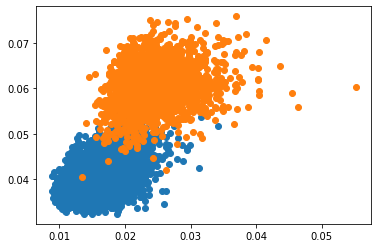

In [ ]:
from numpy import unique
from numpy import where

model = DBSCAN(eps=0.075, min_samples=5)
# fit model and predict clusters
yhat = model.fit_predict(X_data)
# retrieve unique clusters
clusters = unique(yhat)
print(clusters)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X_data[row_ix, 0], X_data[row_ix, 1])
# show the plot
pyplot.show()
#metrics.silhouette_score(X_data, model.labels_)